In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

data_s=[]
with open("ver. 4 users_neighborhood_anon.csv","r") as file:
    for line in file:
        data = line.strip().split(",")
        data_s.append(data)

tag =data_s[0]
users=[]
for data in data_s[1:]:
    user=dict(zip(tag,data))
    users.append(user)

In [12]:
h_users=[]
n_users=[]
o_users=[]
for user in users:
    if user['hate']=='hateful':
        h_users.append(user)
    if user['hate']=='normal':
        n_users.append(user)
    if user['hate']=='other':
        o_users.append(user)
print(len(h_users))
print(len(n_users))
print(len(o_users))

544
4427
95413


In [6]:
h_likeratio=[]
for user in h_users:
    try:
        float(user['favorites_count'])
        float(user['followers_count'])
        if float(user['followers_count'])>0:
            h_likeratio.append(float(user['favorites_count'])/float(user['followers_count']))
    except ValueError:
        pass
r=0
for i in h_likeratio:
    r=r+i
print(r/len(h_likeratio))

16.792200726886243


In [13]:
n_likeratio=[]
for user in n_users:
    try:
        float(user['favorites_count'])
        float(user['followers_count'])
        if float(user['followers_count'])>0:
            n_likeratio.append(float(user['favorites_count'])/float(user['followers_count']))
    except ValueError:
        pass
r=0
for i in n_likeratio:
    r=r+i
print(r/len(n_likeratio))

10.496102171604345


In [14]:
o_likeratio=[]
for user in o_users:
    try:
        float(user['favorites_count'])
        float(user['followers_count'])
        if float(user['followers_count'])>0:
            o_likeratio.append(float(user['favorites_count'])/float(user['followers_count']))
    except ValueError:
        pass
r=0
for i in o_likeratio:
    r=r+i
print(r/len(o_likeratio))

6.778472813731184


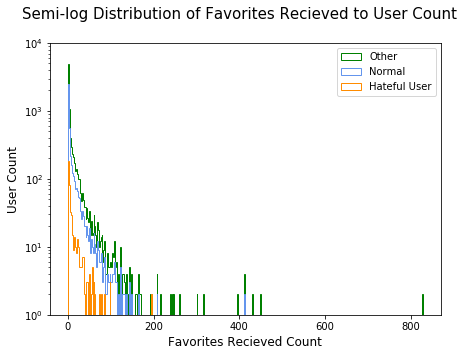

In [12]:
fig=plt.figure(figsize=(7,5)) 
plt.hist([h_likeratio,n_likeratio,n_likeratio], bins=400,histtype='step',log=True,stacked=True,color=['darkorange','cornflowerblue','g'], fill=False, label=['Hateful User','Normal','Other'])
plt.ylim((1,10000))
#plt.xlim((0,60000))

fig.suptitle('Semi-log Distribution of Favorites Recieved to User Count', fontsize=15)
plt.xlabel('Favorites Recieved Count', fontsize=12)
plt.ylabel('User Count', fontsize=12)
plt.legend()
plt.savefig('Favorites Recieved.png')
plt.show()

203208
669036
1030071


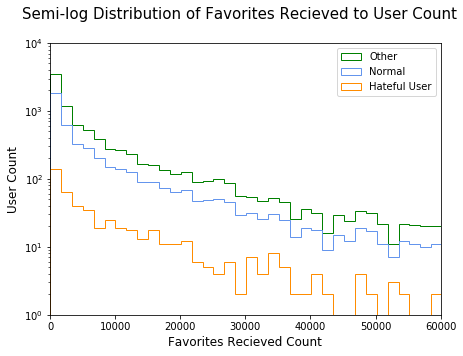

In [132]:
h_favorites_count=[]
for user in h_users:
    if ((int(user['favorites_count'])>=10)):
        h_favorites_count.append(int(user['favorites_count']))
    
n_favorites_count=[]
for user in n_users:
    if ((int(user['favorites_count'])>=10)):
        n_favorites_count.append(int(user['favorites_count']))
        
o_favorites_count=[]
for user in o_users:
    if ((int(user['favorites_count'])>=10)):
        o_favorites_count.append(int(user['favorites_count']))             
print(max(h_favorites_count))
print(max(n_favorites_count))
print(max(o_favorites_count))

#plt.hist(x, n_bins, histtype='step', stacked=True, fill=False)
fig=plt.figure(figsize=(7,5)) 
plt.hist([h_favorites_count,n_favorites_count,n_favorites_count], bins=400,histtype='step',log=True,stacked=True,color=['darkorange','cornflowerblue','g'], fill=False, label=['Hateful User','Normal','Other'])
plt.ylim((1,10000))
plt.xlim((0,60000))

fig.suptitle('Semi-log Distribution of Favorites Recieved to User Count', fontsize=15)
plt.xlabel('Favorites Recieved Count', fontsize=12)
plt.ylabel('User Count', fontsize=12)
plt.legend()
plt.savefig('Favorites Recieved.png')
plt.show()


Hate Max:
203208
Hate Mean:
15433.06779661017
Normal Max:
669036
Normal Mean:
12374.798790416377
Other Max:
1030071
Other Mean:
13229.172018001254


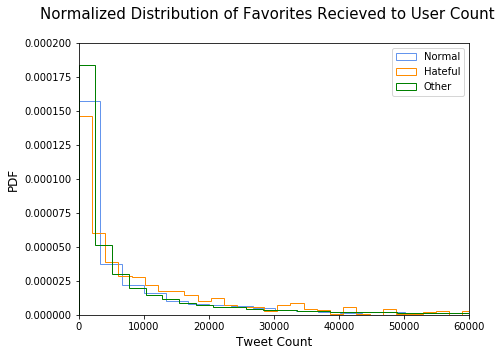

In [133]:
print('Hate Max:')            
print(max(h_favorites_count))
print('Hate Mean:') 
print(sum(h_favorites_count)/len(h_favorites_count))

print('Normal Max:')
print(max(n_favorites_count))
print('Normal Mean:') 
print(sum(n_favorites_count)/len(n_favorites_count))

print('Other Max:')
print(max(o_favorites_count))
print('Other Mean:') 
print(sum(o_favorites_count)/len(o_favorites_count))


fig=plt.figure(figsize=(7,5))
plt.hist(n_favorites_count, density=True ,bins=200,histtype='step',color='cornflowerblue',log=False,stacked=True, fill=False, label='Normal')
plt.hist(h_favorites_count, density=True ,bins=100,histtype='step',color='darkorange',log=False,stacked=True, fill=False, label='Hateful')
plt.hist(o_favorites_count, density=True ,bins=400,histtype='step',color='g',log=False,stacked=True, fill=False, label='Other')


fig.suptitle('Normalized Distribution of Favorites Recieved to User Count', fontsize=15)
plt.xlabel('Tweet Count', fontsize=12)
plt.ylabel('PDF', fontsize=12)
plt.ylim((0,0.0002))
plt.xlim((0,60000))
plt.legend()


plt.savefig('Favorites Recieved Normalized.png')
plt.show()

Hate Max:
200.0
Hate Mean:
115.68819188191883
Normal Max:
200.0
Base Mean:
120.47732426303855
Other Max:
200.0
Other Mean:
122.94140234601021


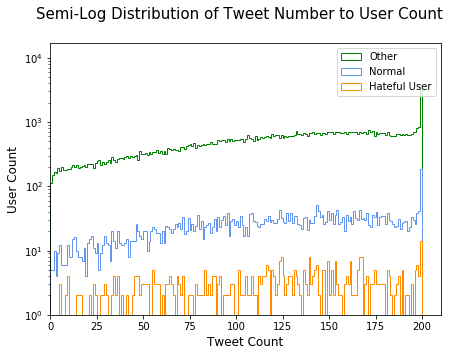

In [134]:
h_tweet_numbers_count=[]
for user in h_users:
    if (user['tweet number']!=''):
        if ((float(user['tweet number'])>=0)):
            h_tweet_numbers_count.append(float(user['tweet number']))
    
n_tweet_numbers_count=[]
for user in n_users:
    if (user['tweet number']!=''):
        if ((float(user['tweet number'])>=0)):
            n_tweet_numbers_count.append(float(user['tweet number']))
o_tweet_numbers_count=[]
for user in o_users:
    if (user['tweet number']!=''):
        if ((float(user['tweet number'])>=0)):
            o_tweet_numbers_count.append(float(user['tweet number']))             
print('Hate Max:')            
print(max(h_tweet_numbers_count))
print('Hate Mean:') 
print(sum(h_tweet_numbers_count)/len(h_tweet_numbers_count))

print('Normal Max:')
print(max(n_tweet_numbers_count))
print('Base Mean:') 
print(sum(n_tweet_numbers_count)/len(n_tweet_numbers_count))

print('Other Max:')
print(max(o_tweet_numbers_count))
print('Other Mean:') 
print(sum(o_tweet_numbers_count)/len(o_tweet_numbers_count))

#plt.hist(x, n_bins, histtype='step', stacked=True, fill=False)
fig=plt.figure(figsize=(7,5)) 
plt.hist([h_tweet_numbers_count,n_tweet_numbers_count,o_tweet_numbers_count], bins=200,histtype='step',color=['darkorange','cornflowerblue','g'],log=True,stacked=True, fill=False, label=['Hateful User','Normal','Other'])
plt.ylim((1,17000))
plt.xlim((0,210))

fig.suptitle('Semi-Log Distribution of Tweet Number to User Count', fontsize=15)
plt.xlabel('Tweet Count', fontsize=12)
plt.ylabel('User Count', fontsize=12)
plt.legend()


plt.savefig('Tweet Number Semi-Log Distribution.png')
plt.show()

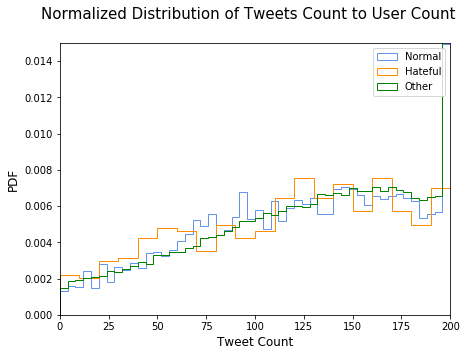

In [135]:
fig=plt.figure(figsize=(7,5))
plt.hist(n_tweet_numbers_count, density=True ,bins=50,histtype='step',color='cornflowerblue',log=False,stacked=True, fill=False, label='Normal')
plt.hist(h_tweet_numbers_count, density=True ,bins=20,histtype='step',color='darkorange',log=False,stacked=True, fill=False, label='Hateful')
plt.hist(o_tweet_numbers_count, density=True ,bins=50,histtype='step',color='g',log=False,stacked=True, fill=False, label='Other')

#plt.hist([n_tweet_numbers_count,h_tweet_numbers_count,o_tweet_numbers_count], density=True ,bins=50,histtype='step',color=['cornflowerblue','darkorange','g'],log=False,stacked=True, fill=False, label=['Normal','Hateful','Other'])

fig.suptitle('Normalized Distribution of Tweets Count to User Count', fontsize=15)
plt.xlabel('Tweet Count', fontsize=12)
plt.ylabel('PDF', fontsize=12)
plt.ylim((0,0.015))
plt.xlim((0,200))
plt.legend()


plt.savefig('Tweet Number Normalized Distribution.png')
plt.show()

Hate Max:
200.0
Hate Mean:
76.84132841328413
Normal Max:
200.0
Base Mean:
74.3467120181406
Other Max:
200.0
Other Mean:
71.70310872652675


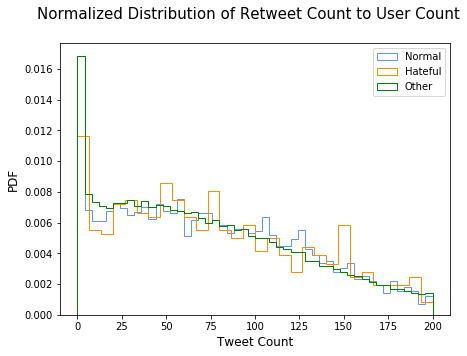

In [136]:
h_retweet_numbers_count=[]
for user in h_users:
    if (user['retweet number']!=''):
        if ((float(user['retweet number'])>=0)):
            h_retweet_numbers_count.append(float(user['retweet number']))
    
n_retweet_numbers_count=[]
for user in n_users:
    if (user['retweet number']!=''):
        if ((float(user['retweet number'])>=0)):
            n_retweet_numbers_count.append(float(user['retweet number']))

o_retweet_numbers_count=[]
for user in o_users:
    if (user['retweet number']!=''):
        if ((float(user['retweet number'])>=0)):
            o_retweet_numbers_count.append(float(user['retweet number']))
            
print('Hate Max:')            
print(max(h_retweet_numbers_count))
print('Hate Mean:') 
print(sum(h_retweet_numbers_count)/len(h_retweet_numbers_count))

print('Normal Max:')
print(max(n_retweet_numbers_count))
print('Base Mean:') 
print(sum(n_retweet_numbers_count)/len(n_retweet_numbers_count))

print('Other Max:')
print(max(o_retweet_numbers_count))
print('Other Mean:') 
print(sum(o_retweet_numbers_count)/len(o_retweet_numbers_count))

#plt.hist(x, n_bins, histtype='step', stacked=True, fill=False)
fig=plt.figure(figsize=(7,5)) 
#plt.hist([h_retweet_numbers_count,b_retweet_numbers_count], density=True ,bins=200,histtype='step',log=False,stacked=True, fill=False, label=['Hateful User','Baseline'])
#plt.ylim((1,17000))
#plt.xlim((0,210))
#fig.suptitle('Semi-Log Distribution of Retweet Number to User Count', fontsize=15)
plt.hist(n_retweet_numbers_count, density=True ,bins=50,histtype='step',color='cornflowerblue',log=False,stacked=True, fill=False, label='Normal')
plt.hist(h_retweet_numbers_count, density=True ,bins=30,histtype='step',color='darkorange',log=False,stacked=True, fill=False, label='Hateful')
plt.hist(o_retweet_numbers_count, density=True ,bins=50,histtype='step',color='g',log=False,stacked=True, fill=False, label='Other')

fig.suptitle('Normalized Distribution of Retweet Count to User Count', fontsize=15)
plt.xlabel('Tweet Count', fontsize=12)
plt.ylabel('PDF', fontsize=12)
plt.legend()


plt.savefig('Retweet Number Normalized.png')
plt.show()

Hate Max:
729.3
Hate Mean:
112.8412844021402
Normal Max:
570.88
Base Mean:
108.18295239246471
Other Max:
912.33
Other Mean:
108.73616512984157


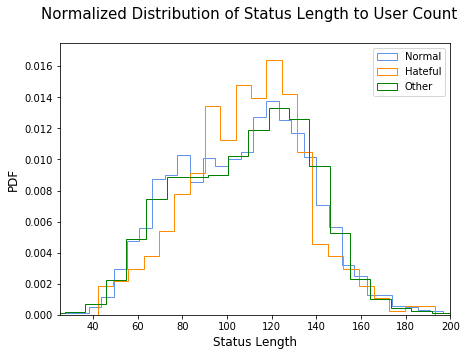

In [137]:
h_status_length=[]
for user in h_users:
    if (user['status length']!=''):
        if ((float(user['status length'])>=0)):
            h_status_length.append(float(user['status length']))
    
n_status_length=[]
for user in n_users:
    if (user['status length']!=''):
        if ((float(user['status length'])>=0)):
            n_status_length.append(float(user['status length']))
            
o_status_length=[]
for user in o_users:
    if (user['status length']!=''):
        if ((float(user['status length'])>=0)):
            o_status_length.append(float(user['status length']))

print('Hate Max:')            
print(max(h_status_length))
print('Hate Mean:') 
print(sum(h_status_length)/len(h_status_length))

print('Normal Max:')
print(max(n_status_length))
print('Base Mean:') 
print(sum(n_status_length)/len(n_status_length))

print('Other Max:')
print(max(o_status_length))
print('Other Mean:') 
print(sum(o_status_length)/len(o_status_length))

fig=plt.figure(figsize=(7,5)) 
#plt.hist([h_status_length,b_status_length], bins=200,density=True ,histtype='step',log=False,stacked=True, fill=False, label=['Hateful User','Baseline'])


plt.ylim((0,0.0175))
plt.xlim((25,200))

plt.hist(n_status_length, density=True ,bins=100,histtype='step',color='cornflowerblue',log=False,stacked=True, fill=False, label='Normal')
plt.hist(h_status_length, density=True ,bins=100,histtype='step',color='darkorange',log=False,stacked=True, fill=False, label='Hateful')
plt.hist(o_status_length, density=True ,bins=100,histtype='step',color='g',log=False,stacked=True, fill=False, label='Other')

fig.suptitle('Normalized Distribution of Status Length to User Count', fontsize=15)
plt.xlabel('Status Length', fontsize=12)
plt.ylabel('PDF', fontsize=12)
plt.legend()


plt.savefig('Status Length Normalized.png')
plt.show()

Hate Max:
9105.0
Hate Mean:
230.5239852398524
Normal Max:
6628.0
Normal Mean:
158.98657259899863
Other Max:
11657.0
Other Mean:
149.2575469906968


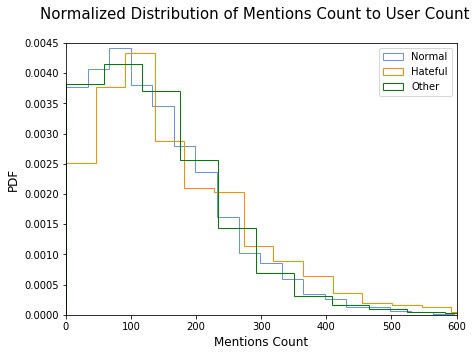

In [138]:
h_ave_mentions=[]
for user in h_users:
    if (user['mentions']!=''):    
        try:
            float(user['mentions'])
            if ((float(user['mentions'])>=0)):
                h_ave_mentions.append(float(user['mentions']))
        except ValueError:
            pass

    
n_ave_mentions=[]
for user in n_users:
    if (user['mentions']!=''):    
        try:
            float(user['mentions'])
            if ((float(user['mentions'])>=0)):
                n_ave_mentions.append(float(user['mentions']))
        except ValueError:
            pass
            
o_ave_mentions=[]
for user in o_users:
    if (user['mentions']!=''):    
        try:
            float(user['mentions'])
            if ((float(user['mentions'])>=0)):
                o_ave_mentions.append(float(user['mentions']))
        except ValueError:
            pass

print('Hate Max:')            
print(max(h_ave_mentions))
print('Hate Mean:') 
print(sum(h_ave_mentions)/len(h_ave_mentions))

print('Normal Max:')
print(max(n_ave_mentions))
print('Normal Mean:') 
print(sum(n_ave_mentions)/len(n_ave_mentions))

print('Other Max:')
print(max(o_ave_mentions))
print('Other Mean:') 
print(sum(o_ave_mentions)/len(o_ave_mentions))

fig=plt.figure(figsize=(7,5)) 
#plt.hist([h_status_length,b_status_length], bins=200,density=True ,histtype='step',log=False,stacked=True, fill=False, label=['Hateful User','Baseline'])


plt.ylim((0,0.0045))
plt.xlim((0,600))

plt.hist(n_ave_mentions, density=True ,bins=200,histtype='step',color='cornflowerblue',log=False,stacked=True, fill=False, label='Normal')
plt.hist(h_ave_mentions, density=True ,bins=200,histtype='step',color='darkorange',log=False,stacked=True, fill=False, label='Hateful')
plt.hist(o_ave_mentions, density=True ,bins=200,histtype='step',color='g',log=False,stacked=True, fill=False, label='Other')



fig.suptitle('Normalized Distribution of Mentions Count to User Count', fontsize=15)
plt.xlabel('Mentions Count', fontsize=12)
plt.ylabel('PDF', fontsize=12)
plt.legend()


plt.savefig('Mentions Normalized.png')
plt.show()

Hate Max:
386.0
Hate Mean:
125.88929889298893
Normal Max:
448.0
Normal Mean:
144.37052154195013
Other Max:
713.0
Other Mean:
150.07494608384619


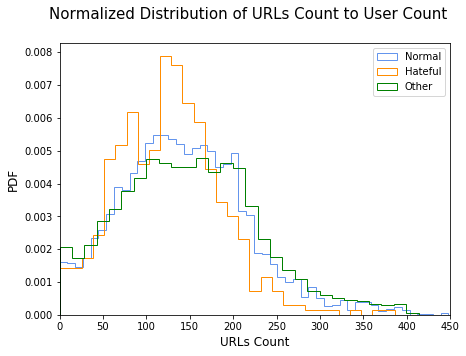

In [139]:
h_ave_urls=[]
for user in h_users:
    if (user['number urls']!=''):    
        try:
            float(user['number urls'])
            if ((float(user['number urls'])>=0)):
                h_ave_urls.append(float(user['number urls']))
        except ValueError:
            pass

    
n_ave_urls=[]
for user in n_users:
    if (user['number urls']!=''):    
        try:
            float(user['number urls'])
            if ((float(user['number urls'])>=0)):
                n_ave_urls.append(float(user['number urls']))
        except ValueError:
            pass
            
o_ave_urls=[]
for user in o_users:
    if (user['number urls']!=''):    
        try:
            float(user['number urls'])
            if ((float(user['number urls'])>=0)):
                o_ave_urls.append(float(user['number urls']))
        except ValueError:
            pass

print('Hate Max:')            
print(max(h_ave_urls))
print('Hate Mean:') 
print(sum(h_ave_urls)/len(h_ave_urls))

print('Normal Max:')
print(max(n_ave_urls))
print('Normal Mean:') 
print(sum(n_ave_urls)/len(n_ave_urls))

print('Other Max:')
print(max(o_ave_urls))
print('Other Mean:') 
print(sum(o_ave_urls)/len(o_ave_urls))

fig=plt.figure(figsize=(7,5)) 

#plt.ylim((0,0.0045))
plt.xlim((0,450))

plt.hist(n_ave_urls, density=True ,bins=50,histtype='step',color='cornflowerblue',log=False,stacked=True, fill=False, label='Normal')
plt.hist(h_ave_urls, density=True ,bins=30,histtype='step',color='darkorange',log=False,stacked=True, fill=False, label='Hateful')
plt.hist(o_ave_urls, density=True ,bins=50,histtype='step',color='g',log=False,stacked=True, fill=False, label='Other')



fig.suptitle('Normalized Distribution of URLs Count to User Count', fontsize=15)
plt.xlabel('URLs Count', fontsize=12)
#I will labe the Y axis as PDF, if you set the attribute cumulative=True, youwill get the CDF.
#Let me know which one do you think is more helpful. 
plt.ylabel('PDF', fontsize=12)
plt.legend()


plt.savefig('URLs Count.png')
plt.show()

Hate Max:
1855.0
Hate Mean:
63.338235294117645
Normal Max:
38896.0
Normal Mean:
263.591145245087
Other Max:
615331.0
Other Mean:
550.1435967845052


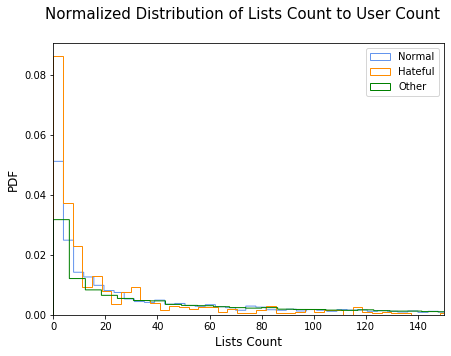

In [140]:
h_lists=[]
for user in h_users:
    if (user['listed_count']!=''):    
        try:
            float(user['listed_count'])
            if ((float(user['listed_count'])>=0)):
                h_lists.append(float(user['listed_count']))
        except ValueError:
            pass

    
n_lists=[]
for user in n_users:
    if (user['listed_count']!=''):    
        try:
            float(user['listed_count'])
            if ((float(user['listed_count'])>=0)):
                n_lists.append(float(user['listed_count']))
        except ValueError:
            pass
            
o_lists=[]
for user in o_users:
    if (user['listed_count']!=''):    
        try:
            float(user['listed_count'])
            if ((float(user['listed_count'])>=0)):
                o_lists.append(float(user['listed_count']))
        except ValueError:
            pass

print('Hate Max:')            
print(max(h_lists))
print('Hate Mean:') 
print(sum(h_lists)/len(h_lists))

print('Normal Max:')
print(max(n_lists))
print('Normal Mean:') 
print(sum(n_lists)/len(n_lists))

print('Other Max:')
print(max(o_lists))
print('Other Mean:') 
print(sum(o_lists)/len(o_lists))

fig=plt.figure(figsize=(7,5)) 

#plt.ylim((0,0.005))
plt.xlim((0,150))

plt.hist(n_lists, density=True ,bins=10000,histtype='step',color='cornflowerblue',log=False,stacked=True, fill=False, label='Normal')
plt.hist(h_lists, density=True ,bins=500,histtype='step',color='darkorange',log=False,stacked=True, fill=False, label='Hateful')
plt.hist(o_lists, density=True ,bins=100000,histtype='step',color='g',log=False,stacked=True, fill=False, label='Other')



fig.suptitle('Normalized Distribution of Lists Count to User Count', fontsize=15)
plt.xlabel('Lists Count', fontsize=12) 
plt.ylabel('PDF', fontsize=12)
plt.legend()


plt.savefig('Lists Count.png')
plt.show()

Hate Max:
0.300198218
Hate Mean:
0.05639239948523981
Hate pos/net ratio
0.9261992619926199
Normal Max:
0.7
Normal Mean:
0.11856268308853578
Normal pos/net ratio
0.9906716417910447
Other Max:
1.0
Other Mean:
0.13519528981747525
Other pos/net ratio
0.9995681231712715


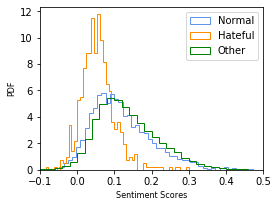

In [15]:
h_sentiment=[]
h_pos=0
h_neg=0
for user in h_users:
    if (user['sentiment']!=''):    
        try:
            float(user['sentiment'])
            if ((float(user['sentiment'])!=0)):
                h_sentiment.append(float(user['sentiment']))
                if (float(user['sentiment'])>=0):
                    h_pos=h_pos+1
                else:
                    h_neg=h_neg+1
        except ValueError:
            pass      
    
n_sentiment=[]
n_pos=0
n_neg=0
for user in n_users:
    if (user['sentiment']!=''):    
        try:
            float(user['sentiment'])
            if ((float(user['sentiment'])!=0)):
                n_sentiment.append(float(user['sentiment']))
                if (float(user['sentiment'])>=0):
                    n_pos=n_pos+1
                else:
                    n_neg=n_neg+1
        except ValueError:
            pass
            
o_sentiment=[]
o_pos=0
o_neg=0
for user in o_users:
    if (user['sentiment']!=''):    
        try:
            float(user['sentiment'])
            if ((float(user['sentiment'])!=0)):
                o_sentiment.append(float(user['sentiment']))
                if (float(user['sentiment'])>=0):
                    o_pos=o_pos+1
                else:
                    o_neg=o_neg+1
        except ValueError:
            pass


      
        
        
print('Hate Max:')            
print(max(h_sentiment))
print('Hate Mean:') 
print(sum(h_sentiment)/len(h_sentiment))
print('Hate pos/net ratio')
print(h_pos/(h_pos+h_neg))

print('Normal Max:')
print(max(n_sentiment))
print('Normal Mean:') 
print(sum(n_sentiment)/len(n_sentiment))
print('Normal pos/net ratio')
print(n_pos/(n_pos+h_neg))

print('Other Max:')
print(max(o_sentiment))
print('Other Mean:') 
print(sum(o_sentiment)/len(o_sentiment))
print('Other pos/net ratio')
print(o_pos/(o_pos+h_neg))


fig=plt.figure(figsize=(4,3)) 

#plt.ylim((0,0.005))
plt.xlim((-0.1,0.5))

plt.hist(n_sentiment, density=True ,bins=100,histtype='step',color='cornflowerblue',log=False,stacked=True, fill=False, label='Normal')
plt.hist(h_sentiment, density=True ,bins=50,histtype='step',color='darkorange',log=False,stacked=True, fill=False, label='Hateful')
plt.hist(o_sentiment, density=True ,bins=100,histtype='step',color='g',log=False,stacked=True, fill=False, label='Other')



#fig.suptitle('Normalized Distribution of Sentiment Scores to User Count', fontsize=15)
plt.xlabel('Sentiment Scores', fontsize=8) 
plt.ylabel('PDF', fontsize=8)
plt.legend()



plt.savefig('Sentiment Scores.png')
plt.show()

Hate Max:
0.639388688
Hate Mean:
0.47754654458302576
Normal Max:
0.753431305
Normal Mean:
0.5029426960381391
Other Max:
1.0
Other Mean:
0.5042076016594871


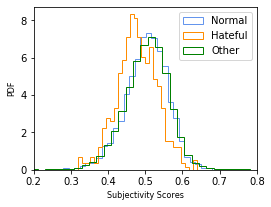

In [14]:
h_subjectivity=[]
for user in h_users:
    if (user['subjectivity']!=''):    
        try:
            float(user['subjectivity'])
            if ((float(user['subjectivity'])!=0)):
                h_subjectivity.append(float(user['subjectivity']))
        except ValueError:
            pass

    
n_subjectivity=[]
for user in n_users:
    if (user['subjectivity']!=''):    
        try:
            float(user['subjectivity'])
            if ((float(user['subjectivity'])!=0)):
                n_subjectivity.append(float(user['subjectivity']))
        except ValueError:
            pass
            
o_subjectivity=[]
for user in o_users:
    if (user['subjectivity']!=''):    
        try:
            float(user['subjectivity'])
            if ((float(user['subjectivity'])!=0)):
                o_subjectivity.append(float(user['subjectivity']))
        except ValueError:
            pass

print('Hate Max:')            
print(max(h_subjectivity))
print('Hate Mean:') 
print(sum(h_subjectivity)/len(h_subjectivity))

print('Normal Max:')
print(max(n_subjectivity))
print('Normal Mean:') 
print(sum(n_subjectivity)/len(n_subjectivity))

print('Other Max:')
print(max(o_subjectivity))
print('Other Mean:') 
print(sum(o_subjectivity)/len(o_subjectivity))

fig=plt.figure(figsize=(4,3)) 

#plt.ylim((0,0.005))
plt.xlim((0.2,0.8))

plt.hist(n_subjectivity, density=True ,bins=40,histtype='step',color='cornflowerblue',log=False,stacked=True, fill=False, label='Normal')
plt.hist(h_subjectivity, density=True ,bins=30,histtype='step',color='darkorange',log=False,stacked=True, fill=False, label='Hateful')
plt.hist(o_subjectivity, density=True ,bins=50,histtype='step',color='g',log=False,stacked=True, fill=False, label='Other')



#fig.suptitle('Normalized Distribution of Subjectivity Scores to User Count', fontsize=15)
plt.xlabel('Subjectivity Scores', fontsize=8) 
plt.ylabel('PDF', fontsize=8)
plt.legend()


plt.savefig('Subjectivity.png')
plt.show()

Hate Max:
0.639388688
Hate Mean:
0.47754654458302576
Normal Max:
0.753431305
Normal Mean:
0.5029426960381391
Other Max:
1.0
Other Mean:
0.5042076016594871


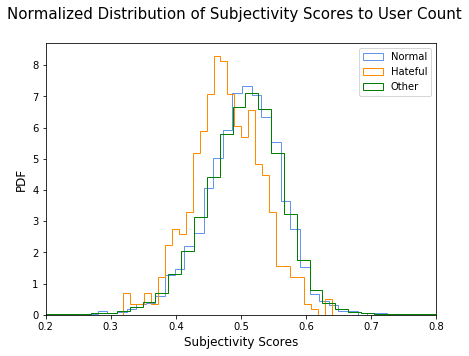

In [145]:
h_subjectivity=[]
for user in h_users:
    if (user['subjectivity']!=''):    
        try:
            float(user['subjectivity'])
            if ((float(user['subjectivity'])!=0)):
                h_subjectivity.append(float(user['subjectivity']))
        except ValueError:
            pass

    
n_subjectivity=[]
for user in n_users:
    if (user['subjectivity']!=''):    
        try:
            float(user['subjectivity'])
            if ((float(user['subjectivity'])!=0)):
                n_subjectivity.append(float(user['subjectivity']))
        except ValueError:
            pass
            
o_subjectivity=[]
for user in o_users:
    if (user['subjectivity']!=''):    
        try:
            float(user['subjectivity'])
            if ((float(user['subjectivity'])!=0)):
                o_subjectivity.append(float(user['subjectivity']))
        except ValueError:
            pass

print('Hate Max:')            
print(max(h_subjectivity))
print('Hate Mean:') 
print(sum(h_subjectivity)/len(h_subjectivity))

print('Normal Max:')
print(max(n_subjectivity))
print('Normal Mean:') 
print(sum(n_subjectivity)/len(n_subjectivity))

print('Other Max:')
print(max(o_subjectivity))
print('Other Mean:') 
print(sum(o_subjectivity)/len(o_subjectivity))

fig=plt.figure(figsize=(7,5)) 

#plt.ylim((0,0.005))
plt.xlim((0.2,0.8))

plt.hist(n_subjectivity, density=True ,bins=40,histtype='step',color='cornflowerblue',log=False,stacked=True, fill=False, label='Normal')
plt.hist(h_subjectivity, density=True ,bins=30,histtype='step',color='darkorange',log=False,stacked=True, fill=False, label='Hateful')
plt.hist(o_subjectivity, density=True ,bins=50,histtype='step',color='g',log=False,stacked=True, fill=False, label='Other')



fig.suptitle('Normalized Distribution of Subjectivity Scores to User Count', fontsize=15)
plt.xlabel('Subjectivity Scores', fontsize=12) 
plt.ylabel('PDF', fontsize=12)
plt.legend()


plt.savefig('Subjectivity.png')
plt.show()

Hate Max:
777.0
Hate Mean:
47.781132075471696
Normal Max:
1488.0
Normal Mean:
84.56614740757963
Other Max:
2138.0
Other Mean:
92.19552229077952


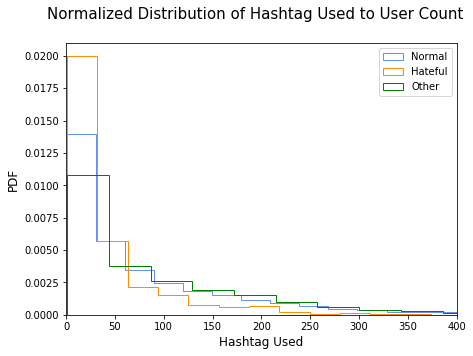

In [146]:
h_hashtag=[]
for user in h_users:
    if (user['number hashtags']!=''):    
        try:
            float(user['number hashtags'])
            if ((float(user['number hashtags'])!=0)):
                h_hashtag.append(float(user['number hashtags']))
        except ValueError:
            pass

    
n_hashtag=[]
for user in n_users:
    if (user['number hashtags']!=''):    
        try:
            float(user['number hashtags'])
            if ((float(user['number hashtags'])!=0)):
                n_hashtag.append(float(user['number hashtags']))
        except ValueError:
            pass
            
o_hashtag=[]
for user in o_users:
    if (user['number hashtags']!=''):    
        try:
            float(user['number hashtags'])
            if ((float(user['number hashtags'])!=0)):
                o_hashtag.append(float(user['number hashtags']))
        except ValueError:
            pass

print('Hate Max:')            
print(max(h_hashtag))
print('Hate Mean:') 
print(sum(h_hashtag)/len(h_hashtag))

print('Normal Max:')
print(max(n_hashtag))
print('Normal Mean:') 
print(sum(n_hashtag)/len(n_hashtag))

print('Other Max:')
print(max(o_hashtag))
print('Other Mean:') 
print(sum(o_hashtag)/len(o_hashtag))

fig=plt.figure(figsize=(7,5)) 

#plt.ylim((0,0.005))
plt.xlim((0,400))

plt.hist(n_hashtag, density=True ,bins=50,histtype='step',color='cornflowerblue',log=False,stacked=True, fill=False, label='Normal')
plt.hist(h_hashtag, density=True ,bins=25,histtype='step',color='darkorange',log=False,stacked=True, fill=False, label='Hateful')
plt.hist(o_hashtag, density=True ,bins=50,histtype='step',color='g',log=False,stacked=True, fill=False, label='Other')



fig.suptitle('Normalized Distribution of Hashtag Used to User Count', fontsize=15)
plt.xlabel('Hashtag Used', fontsize=12) 
plt.ylabel('PDF', fontsize=12)
plt.legend()

plt.savefig('Hashtag Used.png')
plt.show()

Hate Max:
148.0
Hate Mean:
19.47578947368421
Normal Max:
190.6
Normal Mean:
20.620480273729488
Other Max:
314.855
Other Mean:
19.22756955897485


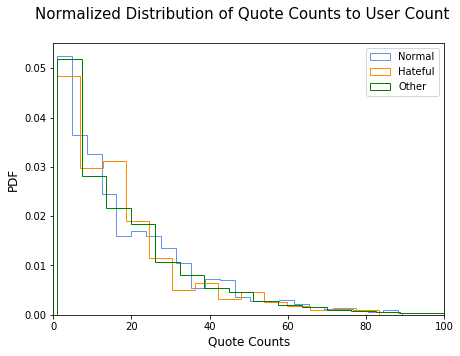

In [147]:
h_quote=[]
for user in h_users:
    if (user['quote number']!=''):    
        try:
            float(user['quote number'])
            if ((float(user['quote number'])!=0)):
                h_quote.append(float(user['quote number']))
        except ValueError:
            pass

    
n_quote=[]
for user in n_users:
    if (user['quote number']!=''):    
        try:
            float(user['quote number'])
            if ((float(user['quote number'])!=0)):
                n_quote.append(float(user['quote number']))
        except ValueError:
            pass
            
o_quote=[]
for user in o_users:
    if (user['quote number']!=''):    
        try:
            float(user['quote number'])
            if ((float(user['quote number'])!=0)):
                o_quote.append(float(user['quote number']))
        except ValueError:
            pass

print('Hate Max:')            
print(max(h_quote))
print('Hate Mean:') 
print(sum(h_quote)/len(h_quote))

print('Normal Max:')
print(max(n_quote))
print('Normal Mean:') 
print(sum(n_quote)/len(n_quote))

print('Other Max:')
print(max(o_quote))
print('Other Mean:') 
print(sum(o_quote)/len(o_quote))

fig=plt.figure(figsize=(7,5)) 

#plt.ylim((0,0.005))
plt.xlim((0,100))

plt.hist(n_quote, density=True ,bins=50,histtype='step',color='cornflowerblue',log=False,stacked=True, fill=False, label='Normal')
plt.hist(h_quote, density=True ,bins=25,histtype='step',color='darkorange',log=False,stacked=True, fill=False, label='Hateful')
plt.hist(o_quote, density=True ,bins=50,histtype='step',color='g',log=False,stacked=True, fill=False, label='Other')

fig.suptitle('Normalized Distribution of Quote Counts to User Count', fontsize=15)
plt.xlabel('Quote Counts', fontsize=12) 
plt.ylabel('PDF', fontsize=12)
plt.legend()


plt.savefig('Quote Counts.png')
plt.show()

Hate Max:
1753311.0
Hate Mean:
9869.033088235294
Normal Max:
19321214.0
Normal Mean:
50187.83005649717
Other Max:
105567180.0
Other Mean:
116727.75552736688


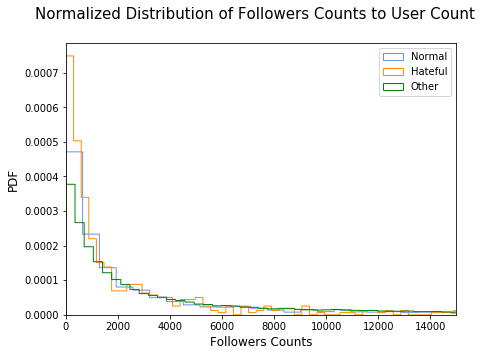

In [148]:
h_followers=[]
for user in h_users:
    if (user['followers_count']!=''):    
        try:
            float(user['followers_count'])
            if ((float(user['followers_count'])!=0)):
                h_followers.append(float(user['followers_count']))
        except ValueError:
            pass

    
n_followers=[]
for user in n_users:
    if (user['followers_count']!=''):    
        try:
            float(user['followers_count'])
            if ((float(user['followers_count'])!=0)):
                n_followers.append(float(user['followers_count']))
        except ValueError:
            pass
            
o_followers=[]
for user in o_users:
    if (user['followers_count']!=''):    
        try:
            float(user['followers_count'])
            if ((float(user['followers_count'])!=0)):
                o_followers.append(float(user['followers_count']))
        except ValueError:
            pass

print('Hate Max:')            
print(max(h_followers))
print('Hate Mean:') 
print(sum(h_followers)/len(h_followers))

print('Normal Max:')
print(max(n_followers))
print('Normal Mean:') 
print(sum(n_followers)/len(n_followers))

print('Other Max:')
print(max(o_followers))
print('Other Mean:') 
print(sum(o_followers)/len(o_followers))

fig=plt.figure(figsize=(7,5)) 

#plt.ylim((0,0.0002))
plt.xlim((0,15000))

plt.hist(n_followers, density=True ,bins=30000,histtype='step',color='cornflowerblue',log=False,stacked=True, fill=False, label='Normal')
plt.hist(h_followers, density=True ,bins=6000,histtype='step',color='darkorange',log=False,stacked=True, fill=False, label='Hateful')
plt.hist(o_followers, density=True ,bins=300000,histtype='step',color='g',log=False,stacked=True, fill=False, label='Other')

fig.suptitle('Normalized Distribution of Followers Counts to User Count', fontsize=15)
plt.xlabel('Followers Counts', fontsize=12) 
plt.ylabel('PDF', fontsize=12)
plt.legend()


plt.savefig('Followers Counts.png')
plt.show()

Hate Max:
116342.0
Hate Mean:
2279.1921641791046
Normal Max:
888458.0
Normal Mean:
2219.886873724779
Other Max:
3078587.0
Other Mean:
2941.1180980464433


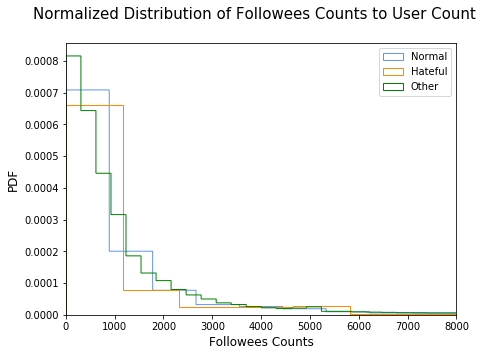

In [150]:
h_followees=[]
for user in h_users:
    if (user['followees_count']!=''):    
        try:
            float(user['followees_count'])
            if ((float(user['followees_count'])!=0)):
                h_followees.append(float(user['followees_count']))
        except ValueError:
            pass

    
n_followees=[]
for user in n_users:
    if (user['followees_count']!=''):    
        try:
            float(user['followees_count'])
            if ((float(user['followees_count'])!=0)):
                n_followees.append(float(user['followees_count']))
        except ValueError:
            pass
            
o_followees=[]
for user in o_users:
    if (user['followees_count']!=''):    
        try:
            float(user['followees_count'])
            if ((float(user['followees_count'])!=0)):
                o_followees.append(float(user['followees_count']))
        except ValueError:
            pass

print('Hate Max:')            
print(max(h_followees))
print('Hate Mean:') 
print(sum(h_followees)/len(h_followees))

print('Normal Max:')
print(max(n_followees))
print('Normal Mean:') 
print(sum(n_followees)/len(n_followees))

print('Other Max:')
print(max(o_followees))
print('Other Mean:') 
print(sum(o_followees)/len(o_followees))

fig=plt.figure(figsize=(7,5)) 

#plt.ylim((0,0.0002))
plt.xlim((0,8000))

plt.hist(n_followees, density=True ,bins=1000,histtype='step',color='cornflowerblue',log=False,stacked=True, fill=False, label='Normal')
plt.hist(h_followees, density=True ,bins=100,histtype='step',color='darkorange',log=False,stacked=True, fill=False, label='Hateful')
plt.hist(o_followees, density=True ,bins=10000,histtype='step',color='g',log=False,stacked=True, fill=False, label='Other')

fig.suptitle('Normalized Distribution of Followees Counts to User Count', fontsize=15)
plt.xlabel('Followees Counts', fontsize=12) 
plt.ylabel('PDF', fontsize=12)
plt.legend()


plt.savefig('Followees Counts.png')
plt.show()